
# PUC MINAS - Ciência de Dados e Big Data

---

![alt text](https://www.pucminas.br/Pos-Graduacao/IEC/Cursos/PublishingImages/Inform%C3%A1tica%20e%20Tecnologia/Ci%C3%AAncia-de-Dados-e-Big-Data.png)

---

***DISCIPLINA***: *Linguagem de Programação para Ciência de Dados*

---
---

**Integrantes do grupo:**

*   **000000** - Lidia
*   **411373** - Gisele Ferreira Araujo
*   **102095** - Guilherme Alves Sotero
*   **000000** - Renato
*   **102115** - Ruam Fillipe D. Coimbra

**Professor:** Diego Augusto de Farias Barros

---
---

**INTRODUÇÃO**

Será realizada a análise de dados referente a Educação Superior no Brasil, para isso, foram utilizadas base de dados disponibilizadas pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira Legislação e Documentos - INEP.

Diante da diversidade que há no Brasil e da atual discusão referente a inclusão social e a adoção de politicas públicas em prol das minorias. Esta análise visa identificar o quantitativo de alunos indigenas e com deficiência que concluíram um curso superior do ano de 2017 no Brasil.

---
***Obs.:*** *Foram utilizados os dados diponíveis no link: http://portal.inep.gov.br/microdados, opção Censo da Educação superior, do ano de 2017.*


---
---

**IMPORTAÇÃO DOS DADOS**

---
---

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
plt.style.use('ggplot')

#Extraindo as bases ano 2017

data_curso = pd.read_csv("Data\curso.csv", sep="|", dtype=object, encoding="ANSI", nrows = 1000000)
Diretorio= r"Data\aluno.csv"
data_aluno = pd.read_csv(Diretorio, sep="|", dtype=object, encoding="ANSI", nrows = 1000000)


---
---

**TRATAMENTO DOS DADOS**

---
---

LIMPEZA E PREPARAÇÃO DOS DADOS

Nesta etapa foram realizadas:

1.   Seleção dos dados necessarios para execução das perguntas.
2.   Os dados foram manipulados realizando a junção e combinação entre tabelas.
3.   Identificados os dados ausentes e substituídos por dados.
4.   Importação dos dados selecionados em novas tabelas.

---

In [0]:
# Criando Data Frames

aluno = pd.DataFrame(data_aluno, columns=['CO_CURSO','CO_IES','CO_ALUNO_CURSO','TP_DEFICIENCIA','IN_DEFICIENCIA_AUDITIVA',
                                          'IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL','IN_DEFICIENCIA_MULTIPLA',
                                          'IN_DEFICIENCIA_SURDEZ','IN_DEFICIENCIA_SURDOCEGUEIRA','IN_DEFICIENCIA_BAIXA_VISAO',
                                          'IN_DEFICIENCIA_CEGUEIRA','IN_DEFICIENCIA_SUPERDOTACAO','IN_TGD_AUTISMO_INFANTIL',
                                          'IN_TGD_TRANSTOR_DESINTEGRATIVO','TP_SITUACAO','TP_COR_RACA','CO_UF_NASCIMENTO'])
curso = pd.DataFrame(data_curso, columns=['CO_CURSO', 'CO_IES','NO_CURSO'])

# Concatenando os data frames
aluno_curso = pd.merge(aluno, curso, on=['CO_CURSO','CO_IES'], how='inner')

# Substituindo os dados faltantes pela expressão "Não se aplica" e "Não informado"
aluno_curso.update(aluno_curso['IN_DEFICIENCIA_AUDITIVA'].fillna('NA'))
aluno_curso.update(aluno_curso['IN_DEFICIENCIA_FISICA'].fillna('NA'))
aluno_curso.update(aluno_curso['IN_DEFICIENCIA_INTELECTUAL'].fillna('NA'))
aluno_curso.update(aluno_curso['IN_DEFICIENCIA_MULTIPLA'].fillna('NA'))
aluno_curso.update(aluno_curso['IN_DEFICIENCIA_SURDEZ'].fillna('NA'))
aluno_curso.update(aluno_curso['IN_DEFICIENCIA_SURDOCEGUEIRA'].fillna('NA'))
aluno_curso.update(aluno_curso['IN_DEFICIENCIA_BAIXA_VISAO'].fillna('NA'))
aluno_curso.update(aluno_curso['IN_DEFICIENCIA_CEGUEIRA'].fillna('NA'))
aluno_curso.update(aluno_curso['IN_DEFICIENCIA_SUPERDOTACAO'].fillna('NA'))
aluno_curso.update(aluno_curso['IN_TGD_AUTISMO_INFANTIL'].fillna('NA'))
aluno_curso.update(aluno_curso['IN_TGD_TRANSTOR_DESINTEGRATIVO'].fillna('NA'))
aluno_curso.update(aluno_curso['CO_UF_NASCIMENTO'].fillna('NI'))

---
---
**APRESENTAÇÃO DOS RESULTADOS**

---
---

Perguntas a serem respondidas:

*   Identificar a quantidade de alunos com deficiência que concluiram o Ensino Superior;
*   Identificar a quantidade de alunos por deficiência;
*   Quais os cursos possuem deficientes;
*   Quais os cursos que mais tiveram alunos com deficiência que concluiram, matricula trancada ou trasnferida;
*   Quantidade de alunos indigenas que concluiram o Ensino Superior;
*   Quantidade de alunos indigenas por curso;
*   Quais os cursos que mais tiveram alunos indigenas formados, com matricula trancada ou trasnferida.

---


```
------------------------------------------
 # PERGUNTAS RELACIONADAS AOS DEFICIENTES
------------------------------------------
```



***Quantidade de alunos com deficiência que concluiram o Ensino Superior?***

In [0]:
# Quantidade de alunos com deficiência que concluiram o Ensino Superior

#Situação Matrícula (TP_SITUACA)
#  6 - Formado
#  3 - Matrícula trancada
#  5 - Transferido 

#Alunos Indigenas (TP_DEFICIENCIA)
#0 - Não
#1 - Sim

def_concluido = aluno_curso[(aluno_curso.TP_SITUACAO == '6') & (aluno_curso.TP_DEFICIENCIA == '1')] [['CO_ALUNO_CURSO','TP_DEFICIENCIA', 'TP_SITUACAO']]
x_def=def_concluido['TP_DEFICIENCIA'].value_counts()

print("\n\nAlunos com deficiência que concluiram o ensino superior\n",def_concluido['TP_DEFICIENCIA'].value_counts())
print("\n")




Alunos com deficiência que concluiram o ensino superior
 1    527
Name: TP_DEFICIENCIA, dtype: int64




---
***Quantidade de alunos por deficiência? (1)***

In [0]:
#Aluno com deficiência (para todos os tipos de deficiência)
#0 - Não
#1 - Sim

qtd_por_def_auditiva  =  aluno_curso[(aluno_curso.IN_DEFICIENCIA_AUDITIVA == '1')]
qtd_por_def_fisica    =  aluno_curso[(aluno_curso.IN_DEFICIENCIA_FISICA == '1')]     
qtd_por_def_intelec   =  aluno_curso[(aluno_curso.IN_DEFICIENCIA_INTELECTUAL == '1')]                             
qtd_por_def_multipla  =  aluno_curso[(aluno_curso.IN_DEFICIENCIA_MULTIPLA == '1')]
qtd_por_def_surdez    =  aluno_curso[(aluno_curso.IN_DEFICIENCIA_SURDEZ == '1')]
qtd_por_def_surceg    =  aluno_curso[(aluno_curso.IN_DEFICIENCIA_SURDOCEGUEIRA == '1')]                       
qtd_por_def_bvisao    =  aluno_curso[(aluno_curso.IN_DEFICIENCIA_BAIXA_VISAO == '1')]                         
qtd_por_def_cegueira  =  aluno_curso[(aluno_curso.IN_DEFICIENCIA_CEGUEIRA == '1')]
qtd_por_def_superdot  =  aluno_curso[(aluno_curso.IN_DEFICIENCIA_SUPERDOTACAO == '1')]                              
qtd_por_def_autismo   =  aluno_curso[(aluno_curso.IN_TGD_AUTISMO_INFANTIL == '1')]                     
qtd_por_def_desinte   =  aluno_curso[(aluno_curso.IN_TGD_TRANSTOR_DESINTEGRATIVO == '1')]    

print(  "Total de alunos com Deficiência Auditiva:",len(qtd_por_def_auditiva),
      "\nTotal de alunos com Deficiência Física:",len(qtd_por_def_fisica),
      "\nTotal de alunos com Deficiência Intelectual:",len(qtd_por_def_intelec),
      "\nTotal de alunos com Deficiência Multipla:",len(qtd_por_def_multipla),
      "\nTotal de alunos com Deficiência Surdez:",len(qtd_por_def_surdez),
      "\nTotal de alunos com Deficiência Surdocegueira:",len(qtd_por_def_surceg),
      "\nTotal de alunos com Deficiência Baixa Visão:",len(qtd_por_def_bvisao),
      "\nTotal de alunos com Deficiência Cegueira:",len(qtd_por_def_cegueira),
      "\nTotal de alunos com Deficiência Super Dotação:",len(qtd_por_def_superdot),
      "\nTotal de alunos com Deficiência Autismo:",len(qtd_por_def_autismo),
      "\nTotal de alunos com Transtorno Desintegrativo:",len(qtd_por_def_desinte))

Total de alunos com Deficiência Auditiva: 745 
Total de alunos com Deficiência Física: 2102 
Total de alunos com Deficiência Intelectual: 392 
Total de alunos com Deficiência Multipla: 81 
Total de alunos com Deficiência Surdez: 189 
Total de alunos com Deficiência Surdocegueira: 6 
Total de alunos com Deficiência Baixa Visão: 1563 
Total de alunos com Deficiência Cegueira: 606 
Total de alunos com Deficiência Super Dotação: 121 
Total de alunos com Deficiência Autismo: 107 
Total de alunos com Transtorno Desintegrativo: 39


---

**Guardando dados em Memoria**

---

In [0]:
#Adicionando as quantidades memoria

q1=qtd_por_def_auditiva['TP_DEFICIENCIA'].value_counts()
q2=qtd_por_def_fisica['TP_DEFICIENCIA'].value_counts()
q3=qtd_por_def_intelec['TP_DEFICIENCIA'].value_counts()
q4=qtd_por_def_multipla['TP_DEFICIENCIA'].value_counts()
q5=qtd_por_def_surdez['TP_DEFICIENCIA'].value_counts()
q6=qtd_por_def_surceg['TP_DEFICIENCIA'].value_counts()
q7=qtd_por_def_bvisao['TP_DEFICIENCIA'].value_counts()
q8=qtd_por_def_cegueira['TP_DEFICIENCIA'].value_counts()
q9=qtd_por_def_superdot['TP_DEFICIENCIA'].value_counts()
q10=qtd_por_def_autismo['TP_DEFICIENCIA'].value_counts()
q11=qtd_por_def_desinte['TP_DEFICIENCIA'].value_counts()

---
***Quantidade de alunos por deficiência? (2)***

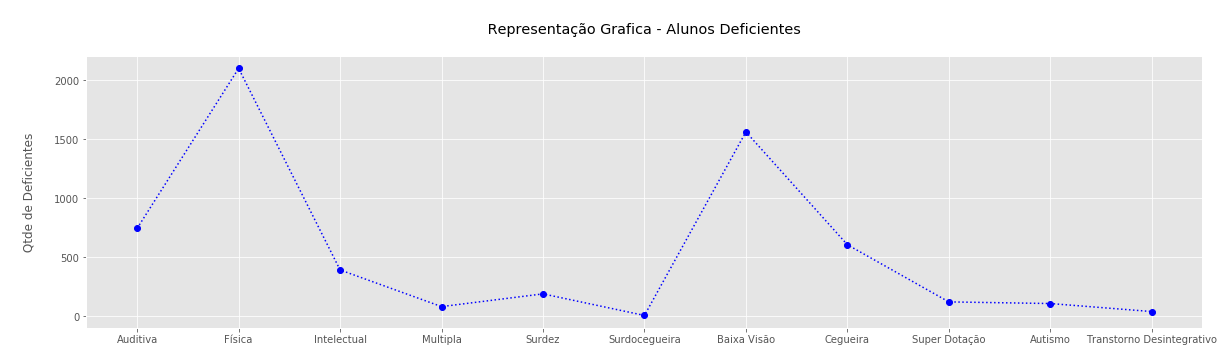

In [0]:
#Ajusta o tamanho do gráfico
plt.rcParams['figure.figsize'] = (20,5)

#Eixo x
lab = ('Auditiva','Física','Intelectual','Multipla','Surdez','Surdocegueira','Baixa Visão','Cegueira','Super Dotação','Autismo','Transtorno Desintegrativo')

#Eixo y
qtd = (q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11)

xs = [i + 0.5 for i, _ in enumerate(lab)] 
plt.plot(xs,qtd,':',color='b',marker="o")

#Nome do eixo y
plt.ylabel("\n Qtde de Deficientes \n")

#Título do gráfico
plt.title("\n Representação Grafica - Alunos Deficientes \n ")
plt.xticks([i + 0.5 for i, _ in enumerate(lab)], lab)
plt.show()

---

***Top 15 | Quais cursos possui deficiêntes?***

***Valores***


In [0]:
cursos_def = aluno_curso[aluno_curso.TP_DEFICIENCIA == '1'] [['CO_ALUNO_CURSO','NO_CURSO']]
ordem_curso_1 = cursos_def['NO_CURSO'].value_counts()

ordem_curso_1[:15]   

DIREITO                    404
PEDAGOGIA                  379
ADMINISTRAÇÃO              335
CIÊNCIAS BIOLÓGICAS        188
HISTÓRIA                   185
EDUCAÇÃO FÍSICA            180
PSICOLOGIA                 172
CIÊNCIAS CONTÁBEIS         145
MATEMÁTICA                 144
ENGENHARIA CIVIL           144
LETRAS - LIBRAS            130
MEDICINA                   119
ARQUITETURA E URBANISMO    110
GEOGRAFIA                  104
ENGENHARIA MECÂNICA         93
Name: NO_CURSO, dtype: int64

---

***Top 15 | Quais cursos possui deficiêntes?***

***Grafico***

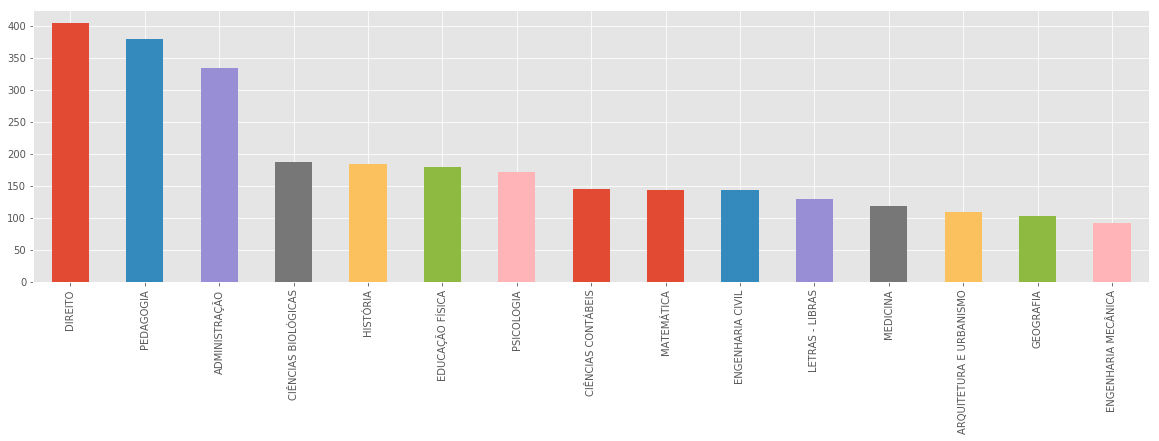

In [0]:
ordem_curso_1[:15].plot.bar()

plt.grid(True)

---

***Top 15 | Quais cursos com maior número de deficientes formados?***

***Valores***



In [0]:
def_concluido_curso = aluno_curso[(aluno_curso.TP_SITUACAO == '6') & (aluno_curso.TP_DEFICIENCIA == '1')] [['CO_ALUNO_CURSO','NO_CURSO', 'TP_DEFICIENCIA', 'TP_SITUACAO']]
ordem_concluido_1 = def_concluido_curso['NO_CURSO'].value_counts()
ordem_concluido_1[:15]      

DIREITO                    56
PEDAGOGIA                  40
ADMINISTRAÇÃO              28
CIÊNCIAS BIOLÓGICAS        22
EDUCAÇÃO FÍSICA            22
PSICOLOGIA                 19
HISTÓRIA                   15
MEDICINA VETERINÁRIA       13
CIÊNCIAS CONTÁBEIS         12
MEDICINA                   12
MATEMÁTICA                 11
LETRAS - LIBRAS            10
ARQUITETURA E URBANISMO     9
ENFERMAGEM                  9
CIÊNCIAS SOCIAIS            9
Name: NO_CURSO, dtype: int64

---

***Top 15 | Quais cursos com maior número de deficientes formados?***

***Grafico***



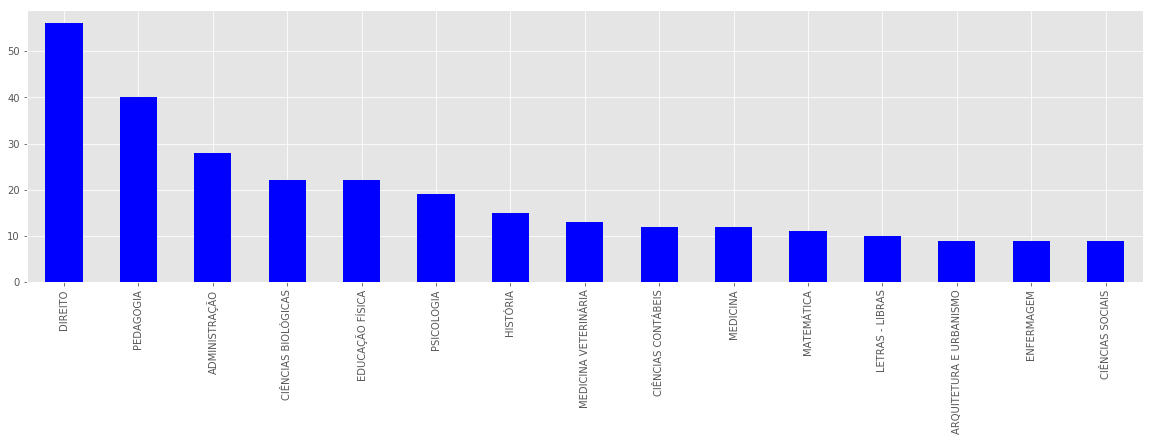

In [0]:
ordem_concluido_1[:15].plot.bar(color='blue')

plt.grid(True)

---

***Top 15 | Quais cursos com maior número de deficientes matricula trancada?***

***Valores***


In [0]:
def_trancada_curso = aluno_curso[(aluno_curso.TP_SITUACAO == '3') & (aluno_curso.TP_DEFICIENCIA == '1')] [['CO_ALUNO_CURSO','NO_CURSO', 'TP_DEFICIENCIA', 'TP_SITUACAO']]
ordem_trancada_1 = def_trancada_curso['NO_CURSO'].value_counts()
ordem_trancada_1[:15]      

DIREITO                       37
ADMINISTRAÇÃO                 36
ENGENHARIA CIVIL              18
HISTÓRIA                      17
PEDAGOGIA                     17
EDUCAÇÃO FÍSICA               17
MATEMÁTICA                    16
PSICOLOGIA                    16
CIÊNCIAS CONTÁBEIS            14
CIÊNCIAS BIOLÓGICAS           14
FILOSOFIA                     13
ARQUITETURA E URBANISMO       12
ENGENHARIA MECÂNICA           11
NUTRIÇÃO                      11
LETRAS - LÍNGUA PORTUGUESA    10
Name: NO_CURSO, dtype: int64

---

***Top 15 | Quais cursos com maior número de deficientes matricula trancada?***

***Grafico***


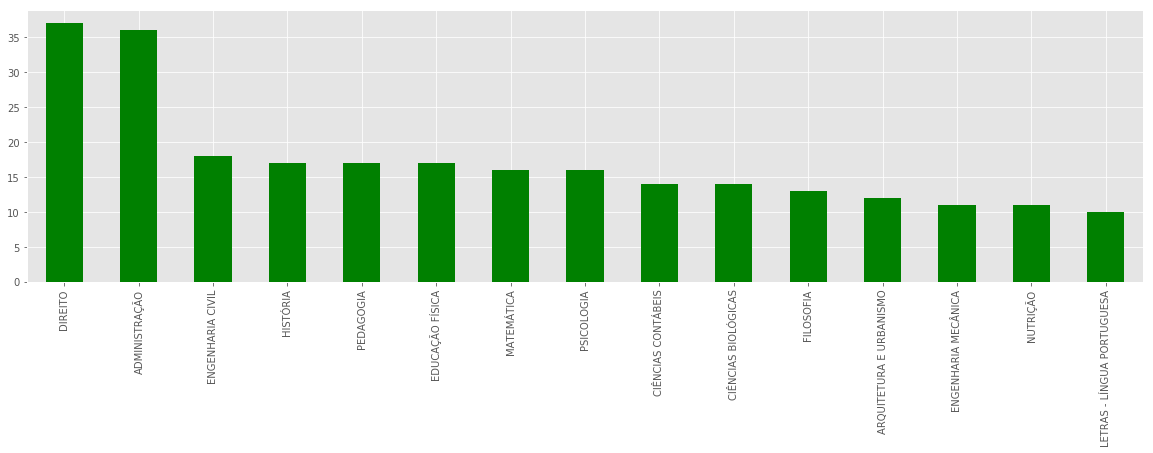

In [0]:
ordem_trancada_1[:15].plot.bar(color='green')

plt.grid(True)

---

***Top 15 | Quais cursos com maior número de deficientes  transferida?***

***Valores***


In [0]:
def_transferencia_curso = aluno_curso[(aluno_curso.TP_SITUACAO == '5') & (aluno_curso.TP_DEFICIENCIA == '1')] [['CO_ALUNO_CURSO','NO_CURSO', 'TP_DEFICIENCIA', 'TP_SITUACAO']]
ordem_transferencia_1 = def_transferencia_curso['NO_CURSO'].value_counts()
ordem_transferencia_1[:15]      

ENGENHARIA MECÂNICA          5
DIREITO                      3
ENGENHARIA DE PRODUÇÃO       3
ABI - CIÊNCIAS BIOLÓGICAS    3
CIÊNCIAS ECONÔMICAS          3
ABI - FÍSICA                 2
ADMINISTRAÇÃO                2
ENGENHARIA DA COMPUTAÇÃO     2
ABI - QUÍMICA                2
CIÊNCIAS CONTÁBEIS           2
EDUCAÇÃO FÍSICA              2
ENGENHARIA CIVIL             2
ENGENHARIA QUÍMICA           2
RELAÇÕES INTERNACIONAIS      1
ABI - CIÊNCIAS SOCIAIS       1
Name: NO_CURSO, dtype: int64

---

***Top 15 | Quais cursos com maior número de deficientes  transferida?***

***Grafico***


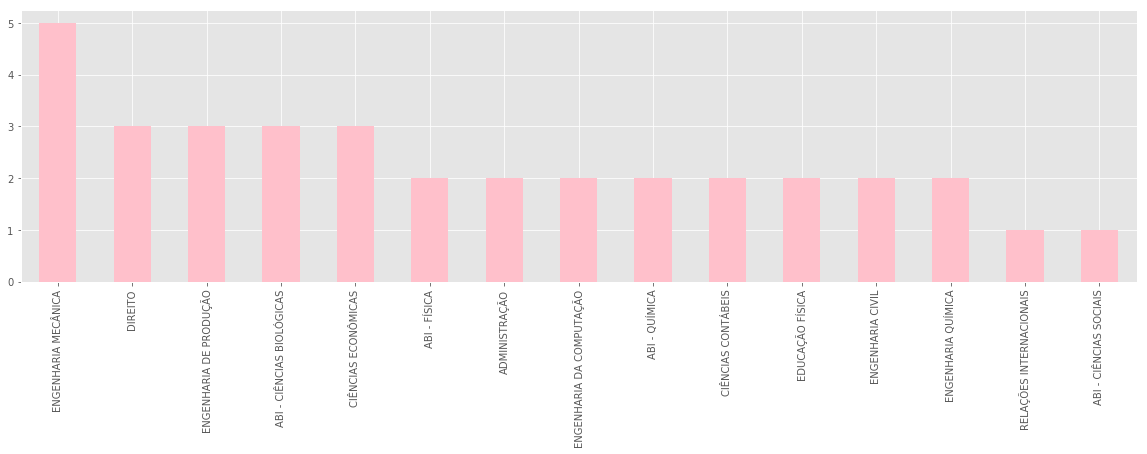

In [0]:
ordem_transferencia_1[:15].plot.bar(color='pink')

plt.grid(True)

```
----------------------------------------
 # PERGUNTAS RELACIONADAS AOS INDIGENAS
----------------------------------------
```

---

***Quantidade de alunos Indígena que cursam/concluiram o Ensino Superior?***


In [0]:
#Situação Matrícula (TP_SITUACA)
#  6 - Formado
#  3 - Matrícula trancada
#  5 - Transferido 

#Aluno Indígena (TP_COR_RACA)
#5 - Indígena

total_aluno_indigena = aluno_curso[(aluno_curso.TP_COR_RACA == '5')]

print("Alunos Indígenas que cursam o Ensino Superior em 2017:",len(total_aluno_indigena))
               
aluno_indigena = aluno_curso[(aluno_curso.TP_SITUACAO == '6') & (aluno_curso.TP_COR_RACA == '5')] [['CO_ALUNO_CURSO','TP_COR_RACA','TP_SITUACAO']]
a_indio=aluno_indigena['TP_SITUACAO'].value_counts()

print("\n\nAlunos Indígenas que concluiram o Ensino Superior:",len(aluno_indigena))


Alunos Indígenas que cursam o Ensino Superior em 2017: 4472


Alunos Indígenas que concluiram o Ensino Superior: 377


---

***Top 15 | Cursos que possui Indígenas?***

***Valores***


In [0]:
cursos_indigena = aluno_curso[aluno_curso.TP_COR_RACA == '5'] [['CO_ALUNO_CURSO','NO_CURSO']]
ordem_indigena_1 = cursos_indigena['NO_CURSO'].value_counts()
ordem_indigena_1[:15]  

LICENCIATURA INDÍGENA POLÍTICAS EDUCACIONAIS E DESENVOLVIMENTO SUSTENTÁVEL    371
FORMAÇÃO DE PROFESSORES INDÍGENAS                                             341
LICENCIATURA INTERCULTURAL INDÍGENA                                           265
PEDAGOGIA                                                                     249
ADMINISTRAÇÃO                                                                 216
DIREITO                                                                       195
EDUCAÇÃO FÍSICA                                                               124
CIÊNCIAS BIOLÓGICAS                                                           119
CIÊNCIAS - BIOLOGIA E QUÍMICA                                                 102
MEDICINA                                                                       96
MATEMÁTICA                                                                     88
HISTÓRIA                                                                       86
LETRAS - PORTUGU

---

***Top 15 | Cursos que possui Indígenas?***

***Grafico***


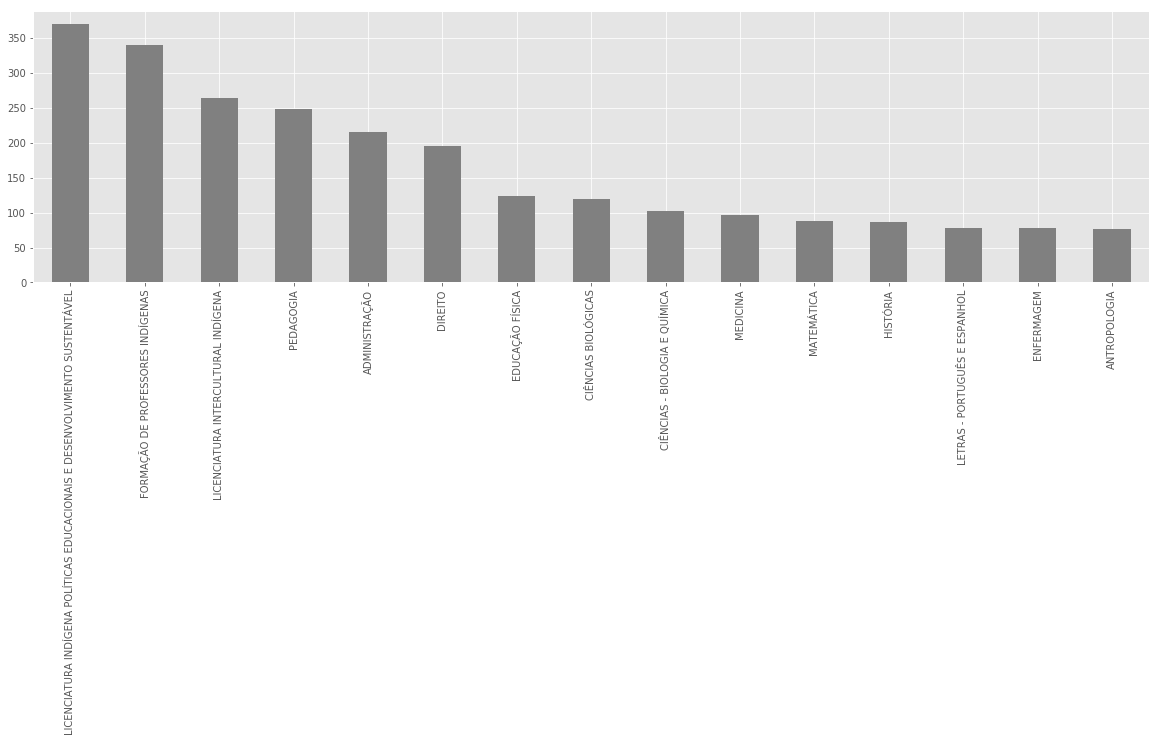

In [0]:
ordem_indigena_1[:15].plot.bar(color='gray')

plt.grid(True)

---

***Top 15 | Quais cursos com maior número de Indígenas formados?***

***Valores***


In [0]:
cursos_indigena_formado = aluno_curso[(aluno_curso.TP_SITUACAO == '6') & (aluno_curso.TP_COR_RACA == '5' )] [['CO_ALUNO_CURSO','NO_CURSO', 'TP_COR_RACA', 'TP_SITUACAO']]
ordem_indigena_F_1 = cursos_indigena_formado['NO_CURSO'].value_counts()
ordem_indigena_F_1[:15]  

LICENCIATURA INTERCULTURAL INDÍGENA                                           57
ADMINISTRAÇÃO                                                                 29
EDUCAÇÃO FÍSICA                                                               28
LICENCIATURA INDÍGENA POLÍTICAS EDUCACIONAIS E DESENVOLVIMENTO SUSTENTÁVEL    23
MATEMÁTICA                                                                    17
DIREITO                                                                       16
CIÊNCIAS CONTÁBEIS                                                            13
PEDAGOGIA                                                                     13
MEDICINA                                                                       9
CIÊNCIAS SOCIAIS                                                               9
ENFERMAGEM                                                                     7
PSICOLOGIA                                                                     6
ARQUITETURA E URBANISMO     

---

***Top 15 | Quais cursos com maior número de Indígenas formados?***

***Grafico***


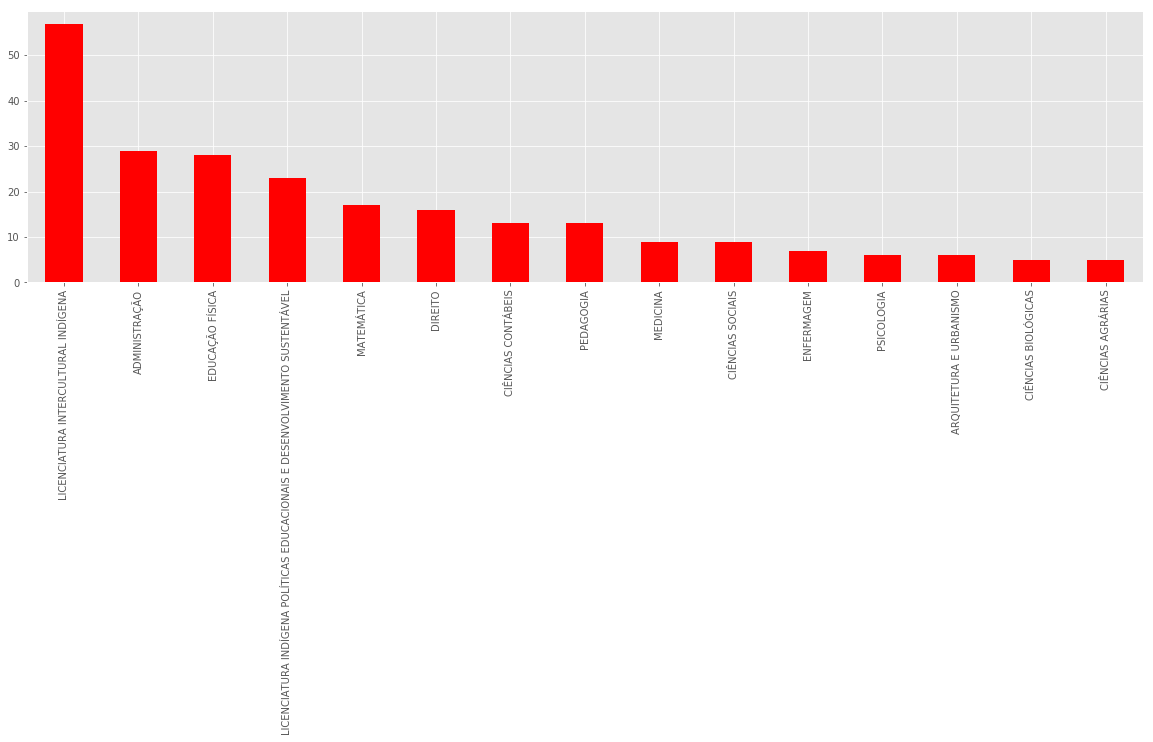

In [0]:
ordem_indigena_F_1[:15].plot.bar(color='red')

plt.grid(True)

---

***Top 15 | Quais cursos com maior número de Indígenas matricula trancada?***

***Valores***


In [0]:
cursos_indigena_trancada = aluno_curso[(aluno_curso.TP_SITUACAO == '3') & (aluno_curso.TP_COR_RACA == '5')] [['CO_ALUNO_CURSO','NO_CURSO', 'TP_COR_RACA', 'TP_SITUACAO']]
ordem_indigena_M_T = cursos_indigena_trancada['NO_CURSO'].value_counts()
ordem_indigena_M_T[:15]  


DIREITO                       21
ADMINISTRAÇÃO                 12
ENGENHARIA CIVIL              11
LETRAS - LÍNGUA PORTUGUESA    10
QUÍMICA                       10
PEDAGOGIA                     10
CIÊNCIAS SOCIAIS              10
EDUCAÇÃO FÍSICA               10
CIÊNCIAS BIOLÓGICAS            9
FILOSOFIA                      8
FÍSICA                         8
GEOGRAFIA                      8
ENFERMAGEM                     8
HISTÓRIA                       7
SISTEMAS DE INFORMAÇÃO         7
Name: NO_CURSO, dtype: int64

---

***Top 15 | Quais cursos com maior número de Indígenas matricula trancada?***

***Grafico***


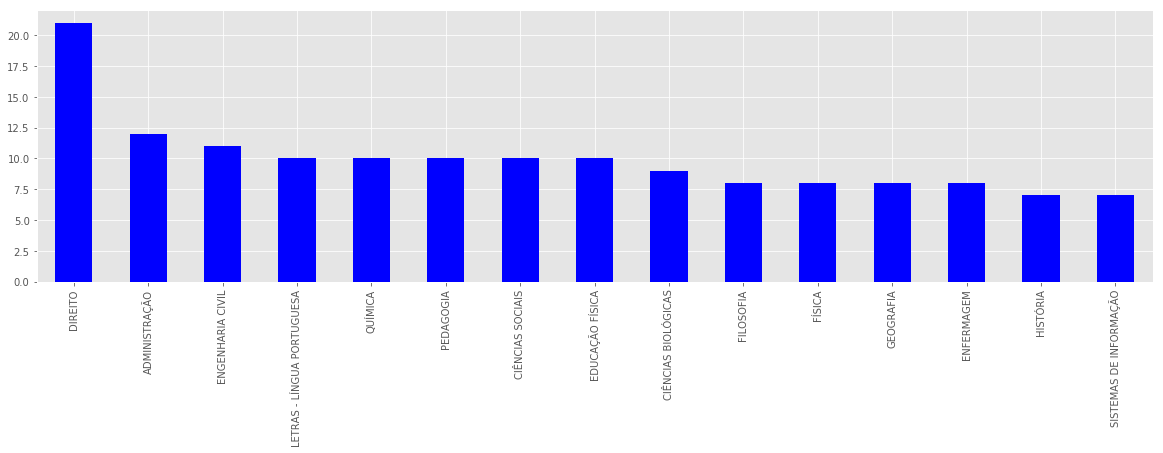

In [0]:
ordem_indigena_M_T[:15].plot.bar(color='blue')    

plt.grid(True)

---

***Top 15 | Quais cursos com maior número de Indígenas matricula transferida?***

***Valores***


In [0]:
cursos_indigena_transferido = aluno_curso[(aluno_curso.TP_SITUACAO == '5') & (aluno_curso.TP_COR_RACA == '5')] [['CO_ALUNO_CURSO','NO_CURSO', 'TP_COR_RACA', 'TP_SITUACAO']]
ordem_indigena_I_M = cursos_indigena_transferido['NO_CURSO'].value_counts()
ordem_indigena_I_M[:15]

EDUCAÇÃO FÍSICA                                      2
ABI - GEOGRAFIA                                      2
CIÊNCIAS BIOLÓGICAS                                  2
PSICOLOGIA                                           2
ABI - ENGENHARIA                                     1
ENGENHARIA CIVIL                                     1
ADMINISTRAÇÃO                                        1
AGROECOLOGIA                                         1
ABI - HISTÓRIA                                       1
ENGENHARIA AGRONÔMICA                                1
SISTEMA DE INFORMAÇÃO                                1
ENGENHARIA DE PRODUÇÃO                               1
CIÊNCIA DA COMPUTAÇÃO                                1
FÍSICA                                               1
LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS    1
Name: NO_CURSO, dtype: int64

---

***Top 15 | Quais cursos com maior número de Indígenas matricula transferida?***

***Grafico***


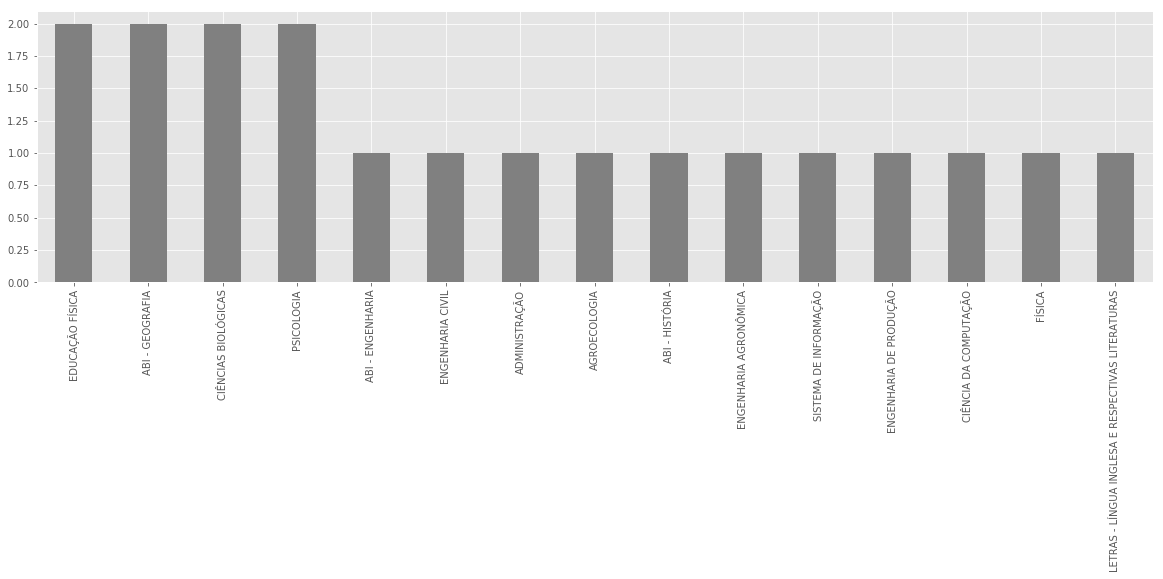

In [0]:
ordem_indigena_I_M[:15].plot.bar(color='gray')    

plt.grid(True)

---
---
```
------------------------------------------------------
 # Relação de Deficientes x Indios - Ensino Superior
------------------------------------------------------
```

---

*** Deficientes x Indios***

***Valores***


In [0]:
um=str(x_def)
do=str(a_indio)
print("\n Deficientes: " + (um))
print("\n Indios: "      + (do))


 Deficientes: 1    527
Name: TP_DEFICIENCIA, dtype: int64

 Indios: 6    377
Name: TP_SITUACAO, dtype: int64


---

*** Deficientes x Indios***

***Grafico***


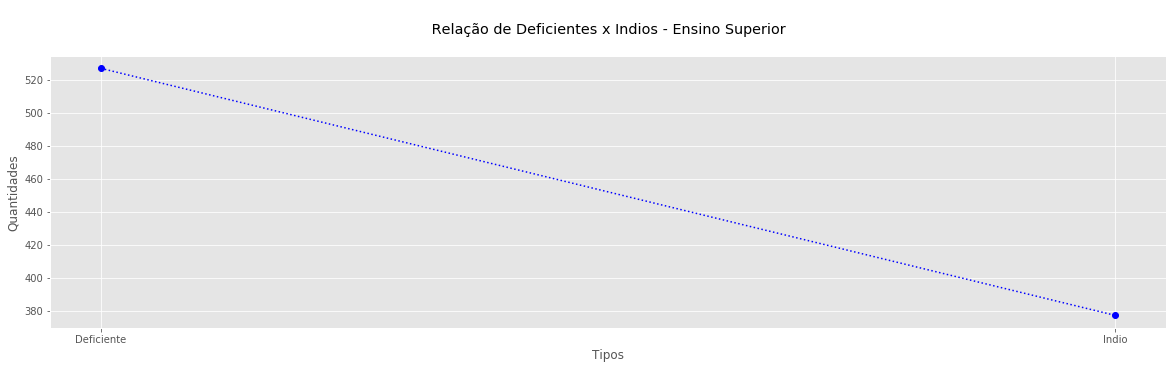

In [0]:
faixa = ['Deficiente','Indio']
valor = [x_def,a_indio]

plt.plot(faixa,valor,':',color='b',marker="o")

plt.xticks(faixa)
plt.ylabel('Quantidades')
plt.xlabel('Tipos')
plt.title('\n Relação de Deficientes x Indios - Ensino Superior \n')

plt.show()

---
------